Projek Bengkel Koding : Switzerland

Nama : Nicholaus Verdhy Putranto

Nim : A11.2020.12447

Kelas : BKDS07

# Load DataSet

In [1]:
#Import library 
import pandas as pd
import numpy as np
import re
import itertools
import matplotlib.pyplot as plt

In [2]:
#load dataset
dir = "long-beach-va.data"

In [3]:
#melakukan encoding pada dataset
with open(dir, encoding='Latin1') as file:
    lines = [line.strip() for line in file]
    
#membuatnya kedalam data frame
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10)))

df = pd.DataFrame.from_records(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1,0,63,1,1,1,1,-9,4,140,...,2,1,1,1,1,1,1,0.7,5.5,name
1,2,0,44,1,1,1,1,-9,4,130,...,1,1,1,1,1,1,1,0.5,-9.,name
2,3,0,60,1,1,1,1,-9,4,132,...,2,1,1,1,1,7,2,0.52,4.1,name
3,4,0,55,1,1,1,1,-9,4,142,...,1,1,1,1,1,1,1,0.73,6.5,name
4,5,0,66,1,1,0,0,-9,3,110,...,1,1,1,1,1,1,1,0.73,8,name


In [4]:
# Melihat informasti tipe data yang ada serta jumlah data yang ada setiap vaiabel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       200 non-null    object
 1   1       200 non-null    object
 2   2       200 non-null    object
 3   3       200 non-null    object
 4   4       200 non-null    object
 5   5       200 non-null    object
 6   6       200 non-null    object
 7   7       200 non-null    object
 8   8       200 non-null    object
 9   9       200 non-null    object
 10  10      200 non-null    object
 11  11      200 non-null    object
 12  12      200 non-null    object
 13  13      200 non-null    object
 14  14      200 non-null    object
 15  15      200 non-null    object
 16  16      200 non-null    object
 17  17      200 non-null    object
 18  18      200 non-null    object
 19  19      200 non-null    object
 20  20      200 non-null    object
 21  21      200 non-null    object
 22  22      200 non-null    ob

In [5]:
#Menghapus kolom 75 berisikan name
df.drop(75,axis=1,inplace=True)

#menhapus kolom 0 karena itu index data
df.drop(0,axis=1,inplace=True)

In [6]:
#mengubah tipe data kolom object menjadi float
df = df.astype(float)

In [7]:
#melihat informasi tipe data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       200 non-null    float64
 1   2       200 non-null    float64
 2   3       200 non-null    float64
 3   4       200 non-null    float64
 4   5       200 non-null    float64
 5   6       200 non-null    float64
 6   7       200 non-null    float64
 7   8       200 non-null    float64
 8   9       200 non-null    float64
 9   10      200 non-null    float64
 10  11      200 non-null    float64
 11  12      200 non-null    float64
 12  13      200 non-null    float64
 13  14      200 non-null    float64
 14  15      200 non-null    float64
 15  16      200 non-null    float64
 16  17      200 non-null    float64
 17  18      200 non-null    float64
 18  19      200 non-null    float64
 19  20      200 non-null    float64
 20  21      200 non-null    float64
 21  22      200 non-null    float64
 22  23

# Validasi Data

In [8]:
df.replace(-9.0,np.nan, inplace=True)

In [9]:
#melihat missing value
df.isna().sum()

1      0
2      0
3      0
4      0
5      0
      ..
70     2
71     2
72     3
73    23
74    81
Length: 74, dtype: int64

In [10]:
df.isna().sum().sum()

4169

In [11]:
#sekarang mari kita lihat 5 data teratas pada data set. kita gunakan pd.set_option untuk melihat full kolom
pd.set_option("Display.max_column",None)
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,0.0,63.0,1.0,1.0,1.0,1.0,NaN,4.0,140.0,0.0,260.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,1.0,22.0,85.0,0.0,0.0,1.0,0.0,0.0,5.0,4.5,NaN,5.0,112.0,62.0,160.0,90.0,140.0,80.0,1.0,0.0,3.0,2.0,20.0,19.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,27.0,85.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.70,5.5
1,0.0,44.0,1.0,1.0,1.0,1.0,NaN,4.0,130.0,0.0,209.0,0.0,20.0,10.0,0.0,1.0,0.0,1.0,7.0,23.0,84.0,0.0,0.0,1.0,0.0,0.0,5.0,2.5,NaN,2.0,127.0,73.0,150.0,80.0,130.0,70.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,31.0,84.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.50,NaN
2,0.0,60.0,1.0,1.0,1.0,1.0,NaN,4.0,132.0,1.0,218.0,1.0,40.0,40.0,0.0,NaN,0.0,1.0,6.0,12.0,84.0,0.0,0.0,1.0,0.0,NaN,5.0,6.0,NaN,6.0,140.0,68.0,210.0,110.0,132.0,80.0,1.0,0.0,1.5,3.0,21.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,30.0,84.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,7.0,2.0,0.52,4.1
3,0.0,55.0,1.0,1.0,1.0,1.0,NaN,4.0,142.0,0.0,228.0,1.0,20.0,30.0,0.0,NaN,0.0,1.0,9.0,7.0,84.0,0.0,0.0,0.0,0.0,0.0,5.0,8.2,8.0,10.0,149.0,60.0,195.0,100.0,142.0,80.0,1.0,0.0,2.5,1.0,10.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,14.0,84.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.73,6.5
4,0.0,66.0,1.0,1.0,0.0,0.0,NaN,3.0,110.0,1.0,213.0,0.0,20.0,8.0,1.0,1.0,1.0,2.0,4.0,25.0,86.0,1.0,1.0,1.0,0.0,0.0,5.0,7.5,7.5,7.0,99.0,66.0,155.0,60.0,110.0,70.0,1.0,0.0,1.3,2.0,15.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,86.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.73,8.0


# Menentukan Fitur

Sesuai dengan sumber penjjelasan datasetnya, fitur yang dugunakan ada pada kolom yang ada pada lokasi [1, 2, 7,8,10,14,17,30,36,38,39,42,49,56]. Maka dari itu kita melakukan pengambilan kolom tersebut

In [12]:
df_selected = df.iloc[:, [1, 2, 7,8,10,14,17,30,36,38,39,42,49,56]]
df_selected

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,63.0,1.0,4.0,140.0,260.0,0.0,1.0,112.0,1.0,3.0,2.0,NaN,NaN,2.0
1,44.0,1.0,4.0,130.0,209.0,0.0,1.0,127.0,0.0,0.0,NaN,NaN,NaN,0.0
2,60.0,1.0,4.0,132.0,218.0,0.0,1.0,140.0,1.0,1.5,3.0,NaN,NaN,2.0
3,55.0,1.0,4.0,142.0,228.0,0.0,1.0,149.0,1.0,2.5,1.0,NaN,NaN,1.0
4,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,2.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54.0,0.0,4.0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,NaN,NaN,NaN,1.0
196,62.0,1.0,1.0,NaN,139.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
197,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,NaN,NaN,6.0,2.0
198,58.0,1.0,4.0,NaN,385.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


Setelah itu, kita mengganti kolom  nama sesuai dengan arahan dari sumber data set. kita gunakan .rename untuk menggantinya. Sebelumnya kita membuat dictionary yang nantinya kita gunakan untuk mengganti nama kolom

Agar tidak menghilangkan data awal / mentah. Mari kita copy dataframenya kedalam df_selected_copy. Hal ini untuk mengantisipasi agar data asli tidak terkontaminasi dengan data yang telah di prosesing

In [13]:
df_selected_copy = df_selected.copy()

In [14]:
#buat dictionary nama
nama_kolom = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target'
}

In [15]:
#mengubah nama kolom .rename
df_selected_copy.rename(columns=nama_kolom,inplace=True)

In [16]:
df_selected_copy.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,4.0,140.0,260.0,0.0,1.0,112.0,1.0,3.0,2.0,NaN,NaN,2.0
1,44.0,1.0,4.0,130.0,209.0,0.0,1.0,127.0,0.0,0.0,NaN,NaN,NaN,0.0
2,60.0,1.0,4.0,132.0,218.0,0.0,1.0,140.0,1.0,1.5,3.0,NaN,NaN,2.0
3,55.0,1.0,4.0,142.0,228.0,0.0,1.0,149.0,1.0,2.5,1.0,NaN,NaN,1.0
4,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,2.0,NaN,NaN,0.0


# Data Cleansing

Memasuki tahap berikutnya yaitu data cleansing. Data cleansing ini akan berguna untuk menghilangkan missing values pada dataset

In [17]:
# melihat missing value pada kolom
nilai_hilang = df_selected_copy.isnull().sum()
df_selected_copy.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       101
ca          198
thal        159
target        0
dtype: int64

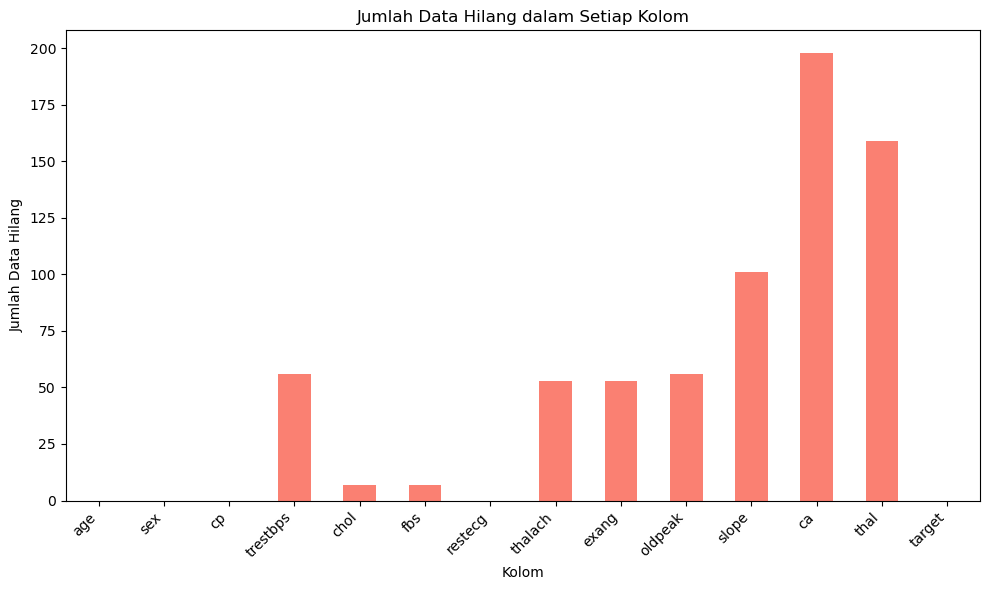

In [18]:
# Plotting grafik jumlah data hilang
plt.figure(figsize=(10, 6))
nilai_hilang.plot(kind='bar', color='salmon')
plt.title('Jumlah Data Hilang dalam Setiap Kolom')
plt.xlabel('Kolom')
plt.ylabel('Jumlah Data Hilang')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [19]:
df_selected_copy.shape

(200, 14)

In [20]:
# Menghitung persentase data hilang untuk setiap kolom
percentage_missing = (df_selected_copy.isnull().sum() / len(df_selected_copy)) * 100

# Menampilkan persentase data hilang untuk setiap kolom
print(round(percentage_missing,2))

age          0.0
sex          0.0
cp           0.0
trestbps    28.0
chol         3.5
fbs          3.5
restecg      0.0
thalach     26.5
exang       26.5
oldpeak     28.0
slope       50.5
ca          99.0
thal        79.5
target       0.0
dtype: float64


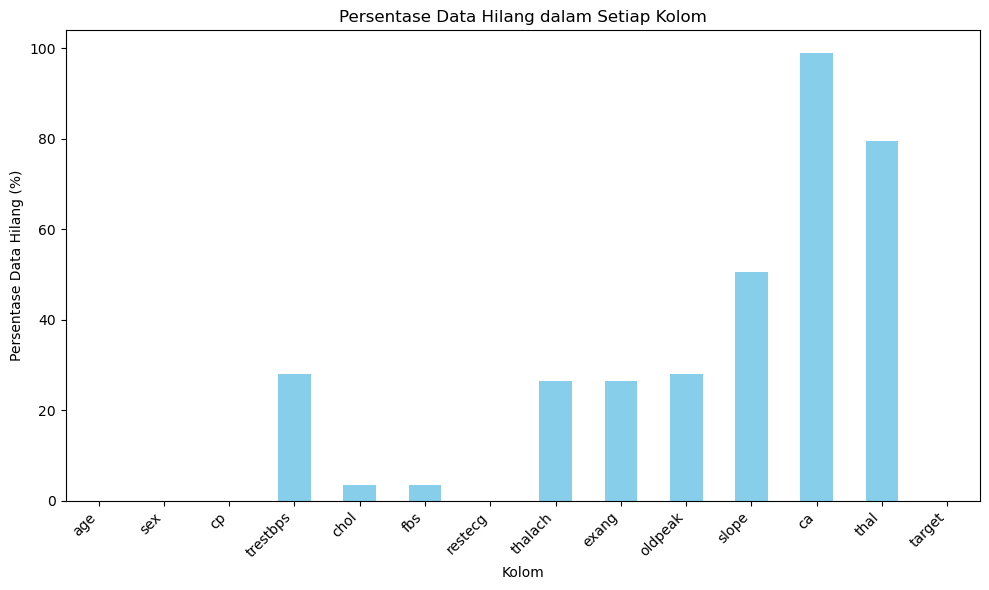

In [21]:
# Plotting grafik persentase data hilang
plt.figure(figsize=(10, 6))
percentage_missing.plot(kind='bar', color='skyblue')
plt.title('Persentase Data Hilang dalam Setiap Kolom')
plt.xlabel('Kolom')
plt.ylabel('Persentase Data Hilang (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
#menghapus fitur yang mnissing valuenyta banyak
df_selected_copy.drop(["ca","fbs"],axis=1, inplace=True)

In [23]:
df_selected_copy.isna().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       101
thal        159
target        0
dtype: int64

In [24]:
df_selected_copy.describe()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,thal,target
count,200.000000,200.000000,200.000000,144.000000,193.000000,200.000000,147.000000,147.000000,144.000000,99.000000,41.000000,200.000000
mean,59.350000,0.970000,3.505000,133.763889,178.746114,0.735000,122.795918,0.646259,1.320833,2.111111,5.707317,1.520000
std,7.811697,0.171015,0.795701,21.537733,114.035232,0.683455,21.990328,0.479765,1.106236,0.698232,1.926706,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,0.000000,1.000000,0.000000
25%,55.000000,1.000000,3.000000,120.000000,0.000000,0.000000,109.000000,0.000000,0.000000,2.000000,5.000000,0.000000
50%,60.000000,1.000000,4.000000,130.000000,216.000000,1.000000,120.000000,1.000000,1.500000,2.000000,7.000000,1.000000
75%,64.000000,1.000000,4.000000,147.000000,258.000000,1.000000,140.000000,1.000000,2.000000,3.000000,7.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,2.000000,180.000000,1.000000,4.000000,3.000000,7.000000,4.000000


In [25]:
#mengisi missing value dengan mean()
df_selected_copy.fillna(df_selected_copy.mean(),inplace=True)
df_selected_copy.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
thal        0
target      0
dtype: int64

In [26]:
df_selected_copy.info()
#ubah tipe kolom df["namakolom"] = df["namaklolom"].astype(jenisdata)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    float64
 1   sex       200 non-null    float64
 2   cp        200 non-null    float64
 3   trestbps  200 non-null    float64
 4   chol      200 non-null    float64
 5   restecg   200 non-null    float64
 6   thalach   200 non-null    float64
 7   exang     200 non-null    float64
 8   oldpeak   200 non-null    float64
 9   slope     200 non-null    float64
 10  thal      200 non-null    float64
 11  target    200 non-null    float64
dtypes: float64(12)
memory usage: 18.9 KB


In [27]:
df_selected_copy.duplicated().sum()

1

In [28]:
# df_duplikat = df_selected_copy.duplicated()
# df_selected_copy[df_selected_copy.duplicated(keep=False)] duplikasi data
# df_selected_copy.drop_duplicates(inplace=True)

In [29]:
df_selected_copy["chol"].value_counts()

0.000000      49
178.746114     7
220.000000     4
203.000000     4
258.000000     4
              ..
198.000000     1
225.000000     1
245.000000     1
227.000000     1
385.000000     1
Name: chol, Length: 100, dtype: int64

# KJorelasi antar Data

In [30]:
# #menampilkan pair plot
# import seaborn as sns

# # Membuat pair plot menggunakan seaborn
# sns.pairplot(df_selected_copy, hue='target')
# plt.show()

<Axes: >

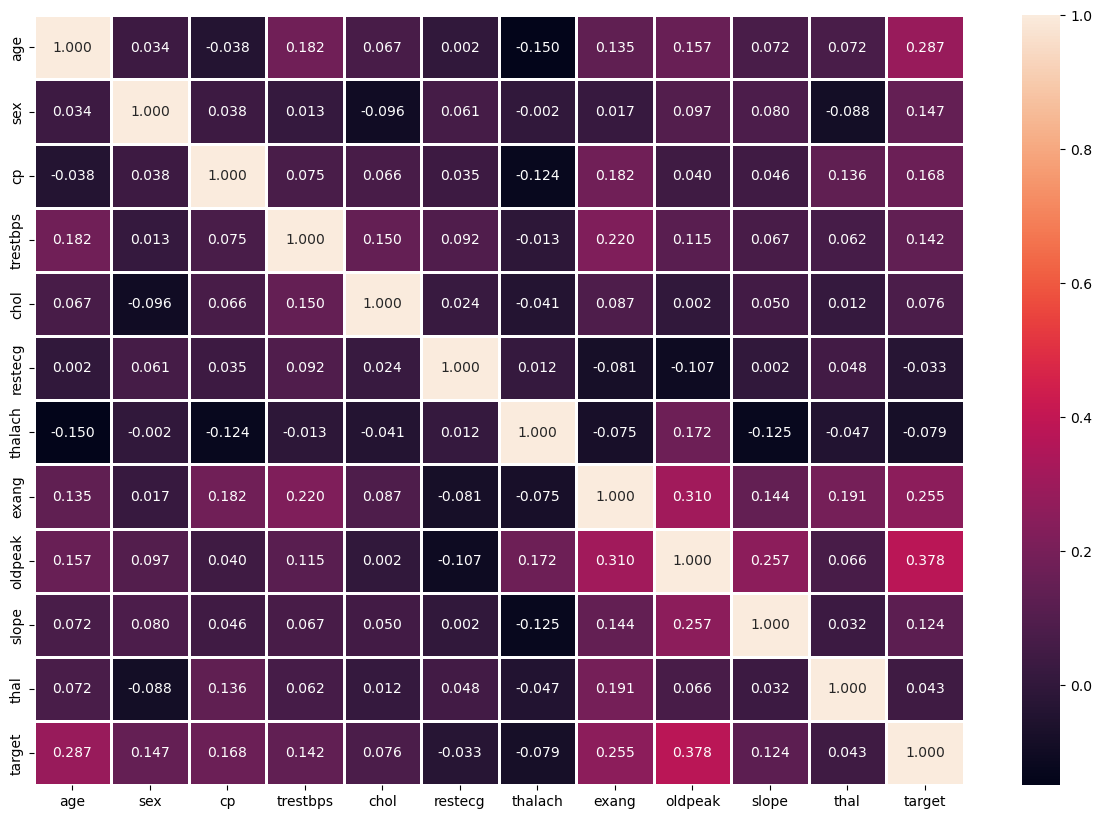

In [32]:
#mendapatkan nilai korelas
import seaborn as sns
korelasi_matrix = df_selected_copy.corr()

#membuat plot
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(korelasi_matrix,annot=True,linewidths=1.0, fmt=".3f")

In [33]:
# #menghapus chol karena 0 smua
# df_selected_copy.drop(["chol"],axis=1,inplace=True)

<Axes: >

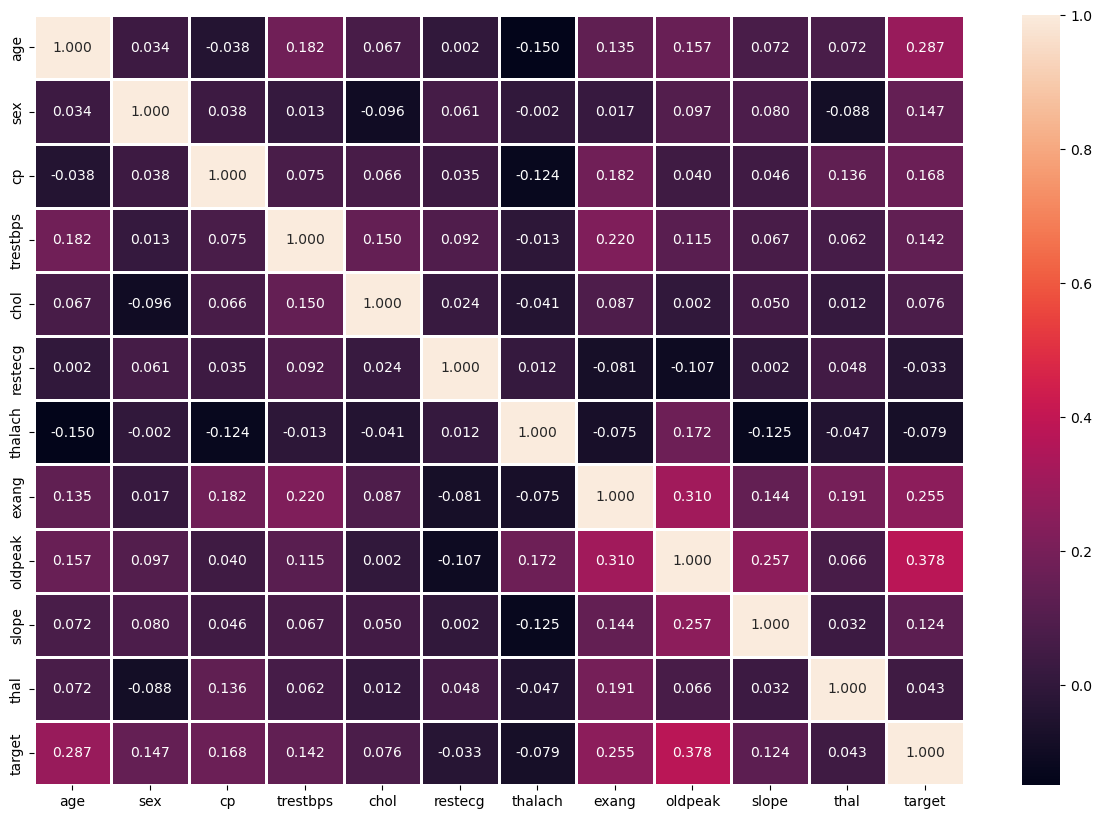

In [34]:
#mendapatkan nilai korelas
korelasi_matrix = df_selected_copy.corr()

#membuat plot
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(korelasi_matrix,annot=True,linewidths=1.0, fmt=".3f")

# Konstruksi Data

Mari kita melakukan pemisahan terhadap dataset kedalam variabel bebas (x) dan variabel terikat(y). Untuk tipe data sudah sesuai dengan kebutuhan yaitu float

In [35]:
df_selected_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    float64
 1   sex       200 non-null    float64
 2   cp        200 non-null    float64
 3   trestbps  200 non-null    float64
 4   chol      200 non-null    float64
 5   restecg   200 non-null    float64
 6   thalach   200 non-null    float64
 7   exang     200 non-null    float64
 8   oldpeak   200 non-null    float64
 9   slope     200 non-null    float64
 10  thal      200 non-null    float64
 11  target    200 non-null    float64
dtypes: float64(12)
memory usage: 18.9 KB


In [36]:
#memasukkan variebl bebas ke dalam x
X = df_selected_copy.drop("target",axis=1)
y = df_selected_copy["target"]

# Balancing Data

In [37]:
df_selected_copy["target"].value_counts()

1.0    56
0.0    51
3.0    42
2.0    41
4.0    10
Name: target, dtype: int64

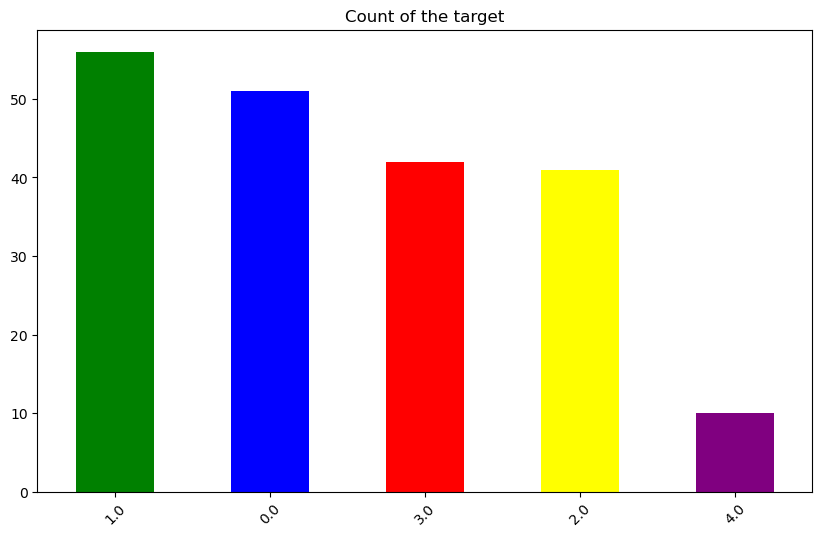

In [38]:
df_selected_copy["target"].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue',"red","yellow","purple"])
plt.title("Count of the target")
plt.xticks(rotation=45);

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
from imblearn.over_sampling import RandomOverSampler

In [41]:
# Tentukan jumlah sampel yang diinginkan
target_jumlah_sampel = 175

# Hitung jumlah sampel saat ini dalam setiap kelas
jumlah_sampel_kelas = df_selected_copy['target'].value_counts().to_dict()

# Tentukan nilai sampling_strategy
sampling_strategy = {}
for target, jumlah_sampel in jumlah_sampel_kelas.items():
    if jumlah_sampel < target_jumlah_sampel:
        sampling_strategy[target] = target_jumlah_sampel - jumlah_sampel

# Gunakan RandomOverSampler
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_smote_resampled, y_smote_resampled = ros.fit_resample(X, y)

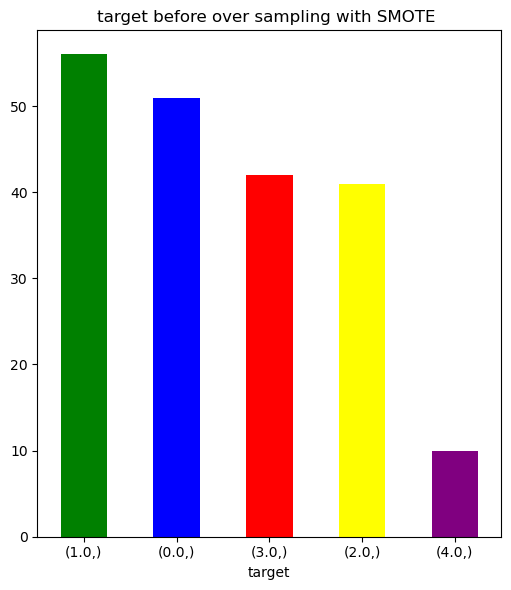

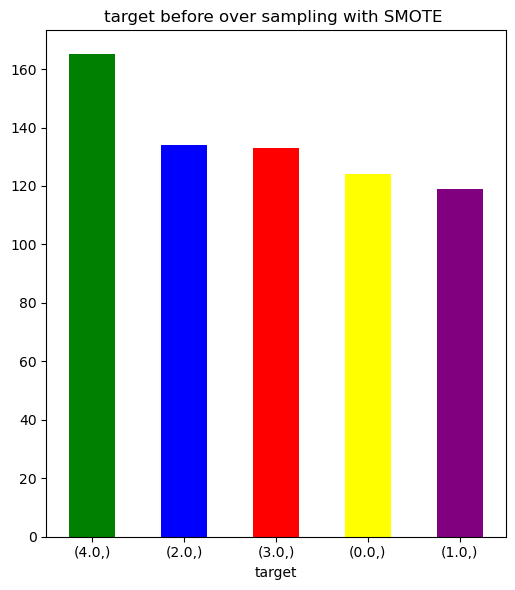

In [42]:
#visualisasi bingkai perbandingan no smote vs SMOTE
plt.figure(figsize=(12,8))

#mempersiapkan data visualisasi no smote dan smote
no_smote_y = pd.DataFrame(data=y)
smote_y = pd.DataFrame(data=y_smote_resampled)

#membuat visulasisi untu no smote
plt.subplot(1, 2, 1)
no_smote_y.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue',"red","yellow","purple"])
plt.title("target before over sampling with SMOTE ")
plt.xticks(rotation=0);
plt.tight_layout()
plt.show()

#membuat visulisasi smote
plt.subplot(1,2,1)
smote_y.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue',"red","yellow","purple"])
plt.title("target before over sampling with SMOTE ")
plt.xticks(rotation=0);

plt.tight_layout()
plt.show()


In [43]:
smote_y["target"].value_counts()

4.0    165
2.0    134
3.0    133
0.0    124
1.0    119
Name: target, dtype: int64

In [44]:
# Buat DataFrame dari hasil oversampling
df_oversampled = pd.DataFrame(data=X_smote_resampled, columns=X.columns)
df_oversampled['target'] = y_smote_resampled

# Hitung jumlah sampel minimum di antara kelas-kelas
min_jumlah_sampel = df_oversampled['target'].value_counts().min()

# Potong jumlah sampel setiap kelas menjadi jumlah minimum
df_final = df_oversampled.groupby('target').head(min_jumlah_sampel).reset_index(drop=True)

# Reset indeks DataFrame hasil akhir
df_final.reset_index(drop=True, inplace=True)

# Hasil akhir DataFrame yang telah dipotong sesuai dengan jumlah sampel minimum
df_final

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,thal,target
0,63.0,1.0,4.0,140.000000,260.0,1.0,112.000000,1.000000,3.000000,2.000000,5.707317,2.0
1,44.0,1.0,4.0,130.000000,209.0,1.0,127.000000,0.000000,0.000000,2.111111,5.707317,0.0
2,60.0,1.0,4.0,132.000000,218.0,1.0,140.000000,1.000000,1.500000,3.000000,5.707317,2.0
3,55.0,1.0,4.0,142.000000,228.0,1.0,149.000000,1.000000,2.500000,1.000000,5.707317,1.0
4,66.0,1.0,3.0,110.000000,213.0,2.0,99.000000,1.000000,1.300000,2.000000,5.707317,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
590,63.0,1.0,4.0,170.000000,177.0,0.0,84.000000,1.000000,2.500000,3.000000,5.707317,4.0
591,62.0,1.0,4.0,160.000000,254.0,1.0,108.000000,1.000000,3.000000,2.000000,5.707317,4.0
592,62.0,1.0,4.0,160.000000,254.0,1.0,108.000000,1.000000,3.000000,2.000000,5.707317,4.0
593,63.0,1.0,4.0,170.000000,177.0,0.0,84.000000,1.000000,2.500000,3.000000,5.707317,4.0


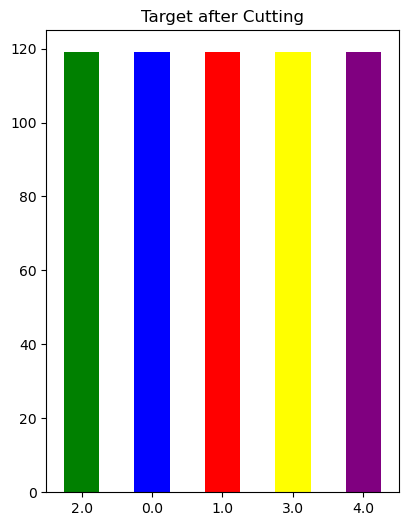

In [45]:
import matplotlib.pyplot as plt

# Membuat subplot dengan 1 baris dan 2 kolom
plt.subplot(1, 2, 2)

# Menghitung dan membuat plot untuk distribusi kelas setelah pemotongan
df_final['target'].value_counts().plot(kind='bar', figsize=(10, 6), color=['green', 'blue', 'red', 'yellow', 'purple'])
plt.title("Target after Cutting")
plt.xticks(rotation=0)

# Menampilkan plot
plt.show()


In [46]:
df_final['target'].value_counts()

2.0    119
0.0    119
1.0    119
3.0    119
4.0    119
Name: target, dtype: int64

In [47]:
df_final

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,thal,target
0,63.0,1.0,4.0,140.000000,260.0,1.0,112.000000,1.000000,3.000000,2.000000,5.707317,2.0
1,44.0,1.0,4.0,130.000000,209.0,1.0,127.000000,0.000000,0.000000,2.111111,5.707317,0.0
2,60.0,1.0,4.0,132.000000,218.0,1.0,140.000000,1.000000,1.500000,3.000000,5.707317,2.0
3,55.0,1.0,4.0,142.000000,228.0,1.0,149.000000,1.000000,2.500000,1.000000,5.707317,1.0
4,66.0,1.0,3.0,110.000000,213.0,2.0,99.000000,1.000000,1.300000,2.000000,5.707317,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
590,63.0,1.0,4.0,170.000000,177.0,0.0,84.000000,1.000000,2.500000,3.000000,5.707317,4.0
591,62.0,1.0,4.0,160.000000,254.0,1.0,108.000000,1.000000,3.000000,2.000000,5.707317,4.0
592,62.0,1.0,4.0,160.000000,254.0,1.0,108.000000,1.000000,3.000000,2.000000,5.707317,4.0
593,63.0,1.0,4.0,170.000000,177.0,0.0,84.000000,1.000000,2.500000,3.000000,5.707317,4.0


In [48]:
#memasukkan variebl bebas ke dalam x
X_smote_resampled = df_final.drop("target",axis=1).values
y_smote_resampled = df_final["target"].values

# Outlier

<Axes: >

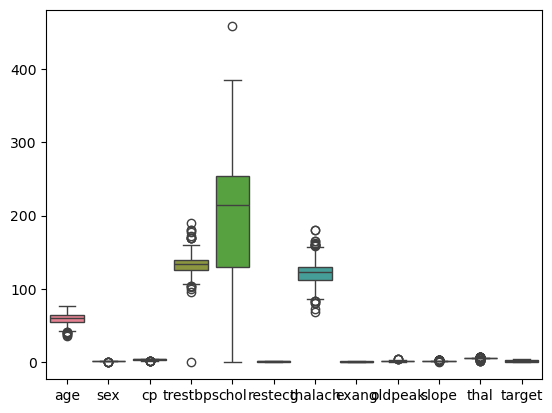

In [49]:
sns.boxplot(df_selected_copy)

# Normalisasi

In [50]:
df_selected_copy.describe()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,thal,target
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,133.763889,178.746114,0.735000,122.795918,0.646259,1.320833,2.111111,5.707317,1.520000
std,7.811697,0.171015,0.795701,18.257507,112.011633,0.683455,18.835692,0.410940,0.937755,0.489989,0.863811,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,0.000000,1.000000,0.000000
25%,55.000000,1.000000,3.000000,125.750000,129.250000,0.000000,112.000000,0.000000,1.000000,2.000000,5.707317,0.000000
50%,60.000000,1.000000,4.000000,133.763889,214.000000,1.000000,122.795918,0.646259,1.320833,2.111111,5.707317,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,130.000000,1.000000,2.000000,2.111111,5.707317,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,2.000000,180.000000,1.000000,4.000000,3.000000,7.000000,4.000000


In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_smote_resampled_normalisasi = scaler.fit_transform(X_smote_resampled)
len(X_smote_resampled_normalisasi)

dfcek1 = pd.DataFrame(X_smote_resampled_normalisasi)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000
mean,0.598119,0.981513,0.857143,0.719701,0.403100,0.392437,0.467886,0.690345,0.460795,0.730781,0.787450
std,0.174026,0.134819,0.235986,0.105222,0.239614,0.350843,0.167577,0.391070,0.228306,0.166157,0.117685
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,1.000000,0.666667,0.684211,0.360262,0.000000,0.369369,0.646259,0.333333,0.666667,0.784553
50%,0.619048,1.000000,1.000000,0.704020,0.467249,0.500000,0.484648,1.000000,0.404630,0.703704,0.784553
75%,0.690476,1.000000,1.000000,0.789474,0.563319,0.500000,0.531532,1.000000,0.555556,0.703704,0.784553
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

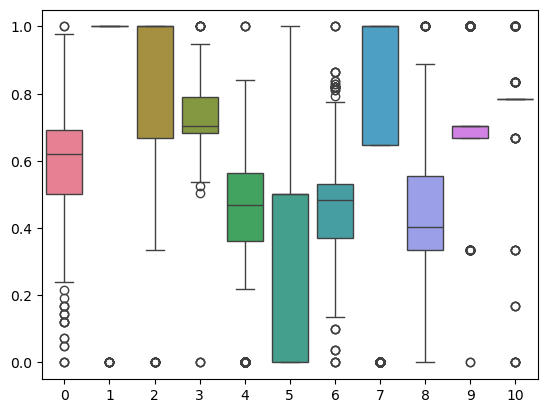

In [52]:
sns.boxplot(X_smote_resampled_normalisasi)

In [53]:
# #menampilkan pair plot
# import seaborn as sns

# gabungan_series = pd.concat([dfcek1, y_smote_resampled], axis=1)

# # Membuat pair plot menggunakan seaborn
# sns.pairplot(gabungan_series, hue='target')
# plt.show()

# spliting data

In [54]:
from sklearn.model_selection import train_test_split

# membagi fitur dan target menjadi data train dan test (untuk yang oversample)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled)

# membagi fitur dan target menjadi data train dan test (untuk yang oversample + normalization)
X_train_normalisasi, X_test_normalisasi, y_train_normalisasi, y_test_normalisasi = train_test_split(X_smote_resampled_normalisasi, y_smote_resampled, test_size=0.2, random_state=42,stratify = y_smote_resampled)

In [55]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score
def evaluation(Y_test,Y_pred):
    acc = accuracy_score(Y_test,Y_pred)
    rcl = recall_score(Y_test,Y_pred,average = 'weighted')
    f1 = f1_score(Y_test,Y_pred,average = 'weighted')
    ps = precision_score(Y_test,Y_pred,average = 'weighted')

    metric_dict={'accuracy': round(acc,3),
    'recall': round(rcl,3),
    'F1 score': round(f1,3),
    'Precision score': round(ps,3)
    }
    
    return print(metric_dict)

# OVersampling

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [57]:
#Knn
KNeighborsClassifier(n_neighbors=3)
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [58]:
y_pred_knn = knn_model.predict(X_test)
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote = round(accuracy_score(y_test,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.765
Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.79      0.75        24
         1.0       0.74      0.74      0.74        23
         2.0       0.67      0.58      0.62        24
         3.0       0.85      0.71      0.77        24
         4.0       0.86      1.00      0.92        24

    accuracy                           0.76       119
   macro avg       0.76      0.76      0.76       119
weighted avg       0.76      0.76      0.76       119



In [59]:
evaluation(y_test,y_pred_knn)

{'accuracy': 0.765, 'recall': 0.765, 'F1 score': 0.761, 'Precision score': 0.764}


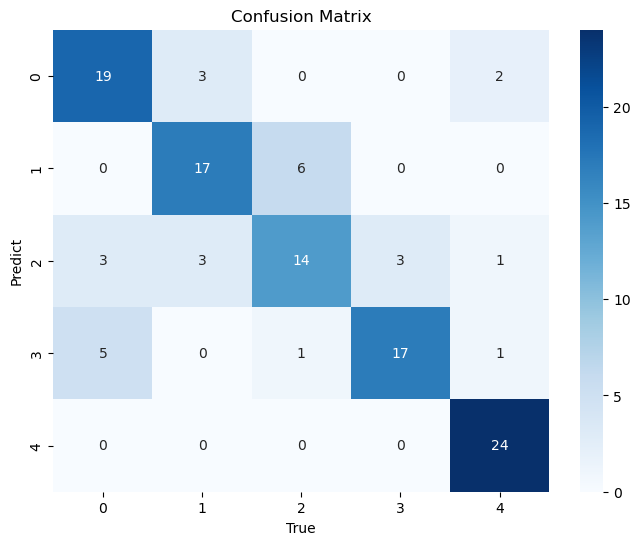

In [60]:
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

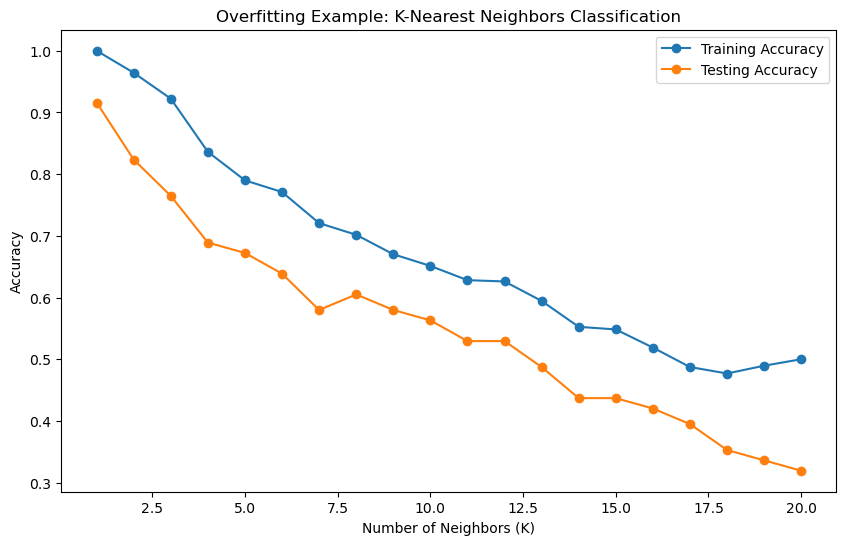

In [61]:
# Fungsi untuk melatih model dan mengukur akurasi pada data pelatihan dan uji
def fit_and_evaluate(n_neighbors):
    # Melatih model KNN
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    
    # Membuat prediksi
    y_train_pred = knn_model.predict(X_train)
    y_test_pred = knn_model.predict(X_test)
    
    # Mengukur akurasi
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)
    
    return acc_train, acc_test, knn_model

# Membuat list untuk menyimpan akurasi
acc_train_list = []
acc_test_list = []
n_neighbors_values = range(1, 21)

# Melatih dan mengevaluasi model KNN untuk setiap nilai n_neighbors
for neighbors in n_neighbors_values:
    acc_train, acc_test, knn_model = fit_and_evaluate(neighbors)
    acc_train_list.append(acc_train)
    acc_test_list.append(acc_test)

# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, acc_train_list, label='Training Accuracy', marker='o')
plt.plot(n_neighbors_values, acc_test_list, label='Testing Accuracy', marker='o')
plt.title('Overfitting Example: K-Nearest Neighbors Classification')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Random Forest Model:
Accuracy: 0.933
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92        24
         1.0       0.91      0.91      0.91        23
         2.0       0.91      0.83      0.87        24
         3.0       1.00      0.92      0.96        24
         4.0       1.00      1.00      1.00        24

    accuracy                           0.93       119
   macro avg       0.94      0.93      0.93       119
weighted avg       0.94      0.93      0.93       119

{'accuracy': 0.933, 'recall': 0.933, 'F1 score': 0.933, 'Precision score': 0.936}


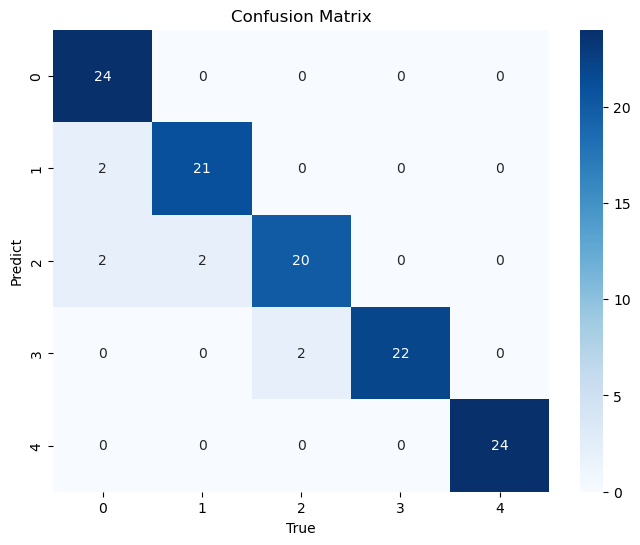

In [62]:
#RF
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

evaluation(y_test,y_pred_rf)
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


XGBoost Model:
Accuracy: 0.941
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        24
         1.0       1.00      0.91      0.95        23
         2.0       0.95      0.83      0.89        24
         3.0       0.85      0.96      0.90        24
         4.0       1.00      1.00      1.00        24

    accuracy                           0.94       119
   macro avg       0.95      0.94      0.94       119
weighted avg       0.95      0.94      0.94       119

{'accuracy': 0.941, 'recall': 0.941, 'F1 score': 0.941, 'Precision score': 0.945}


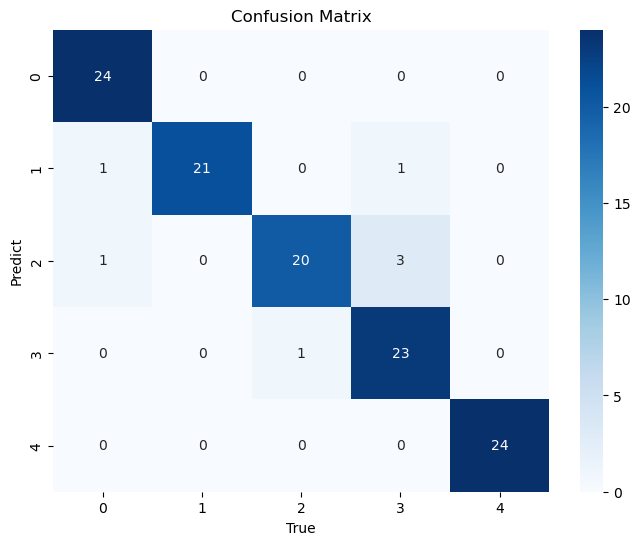

In [63]:
#xgbost
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

evaluation(y_test,y_pred_xgb)

cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# Iversampling dan di normalisasi

In [64]:
#knn 
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_normalisasi, y_train_normalisasi)

y_pred_knn = knn_model.predict(X_test_normalisasi)
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normalisasi = round(accuracy_score(y_test_normalisasi,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normalisasi)
print("Classification Report:")
print(classification_report(y_test_normalisasi, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.739
Classification Report:
              precision    recall  f1-score   support

         0.0       0.58      0.62      0.60        24
         1.0       0.67      0.78      0.72        23
         2.0       0.75      0.62      0.68        24
         3.0       0.76      0.67      0.71        24
         4.0       0.96      1.00      0.98        24

    accuracy                           0.74       119
   macro avg       0.74      0.74      0.74       119
weighted avg       0.74      0.74      0.74       119



In [65]:
evaluation(y_test_normalisasi,y_pred_knn)

{'accuracy': 0.739, 'recall': 0.739, 'F1 score': 0.739, 'Precision score': 0.744}


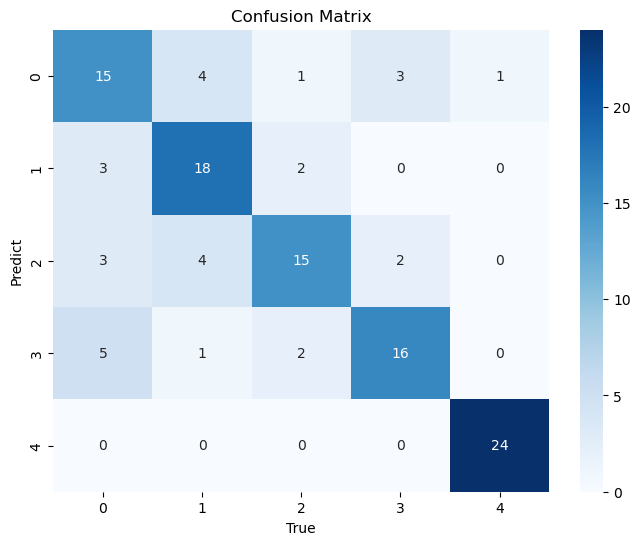

In [66]:
cm = confusion_matrix(y_test_normalisasi, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


Random Forest Model:
Accuracy: 0.924
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92        24
         1.0       0.91      0.91      0.91        23
         2.0       0.90      0.79      0.84        24
         3.0       1.00      0.92      0.96        24
         4.0       0.96      1.00      0.98        24

    accuracy                           0.92       119
   macro avg       0.93      0.92      0.92       119
weighted avg       0.93      0.92      0.92       119

{'accuracy': 0.924, 'recall': 0.924, 'F1 score': 0.923, 'Precision score': 0.927}


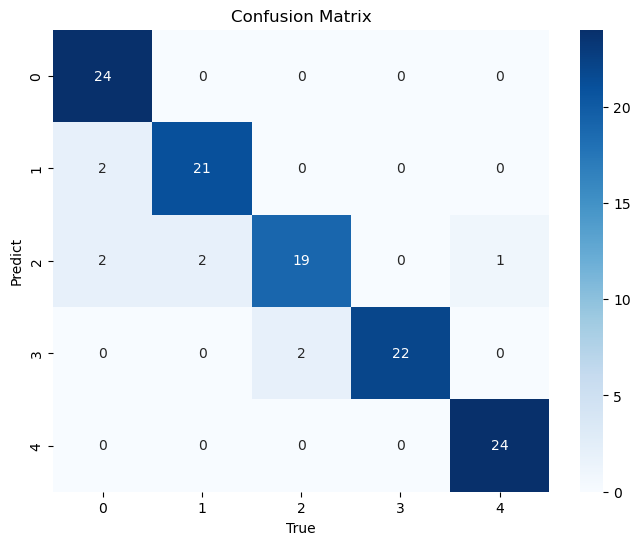

In [67]:
#rf
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normalisasi, y_train_normalisasi)

y_pred_rf = rf_model.predict(X_test_normalisasi)
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normalisasi = round(accuracy_score(y_test_normalisasi, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normalisasi )
print("Classification Report:")
print(classification_report(y_test_normalisasi, y_pred_rf))

evaluation(y_test_normalisasi,y_pred_rf)

cm = confusion_matrix(y_test_normalisasi, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

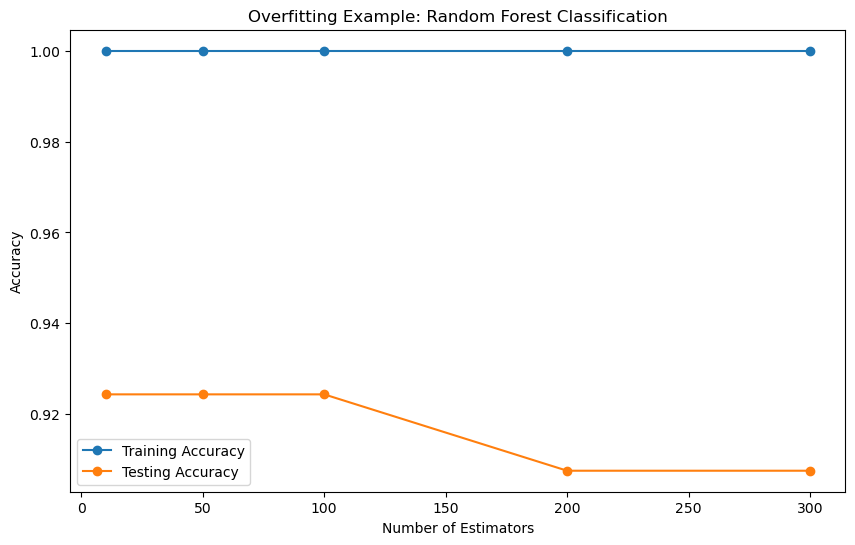

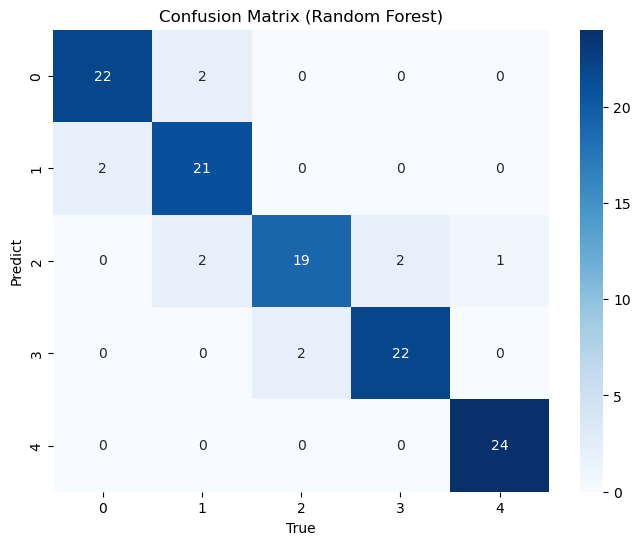

In [68]:
# Fungsi untuk melatih model dan mengukur akurasi pada data pelatihan dan uji
def fit_and_evaluate_rf(n_estimators):
    # Melatih model Random Forest
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train_normalisasi, y_train_normalisasi)
    
    # Membuat prediksi
    y_train_pred_rf = rf_model.predict(X_train_normalisasi)
    y_test_pred_rf = rf_model.predict(X_test_normalisasi)
    
    # Mengukur akurasi
    acc_train_rf = accuracy_score(y_train_normalisasi, y_train_pred_rf)
    acc_test_rf = accuracy_score(y_test_normalisasi, y_test_pred_rf)
    
    return acc_train_rf, acc_test_rf, rf_model

# Membuat list untuk menyimpan akurasi
acc_train_rf_list = []
acc_test_rf_list = []
n_estimators_values = [10, 50, 100, 200, 300]  # Ganti dengan nilai yang sesuai

# Melatih dan mengevaluasi model Random Forest untuk setiap nilai n_estimators
for n_estimators in n_estimators_values:
    acc_train_rf, acc_test_rf, rf_model = fit_and_evaluate_rf(n_estimators)
    acc_train_rf_list.append(acc_train_rf)
    acc_test_rf_list.append(acc_test_rf)

# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, acc_train_rf_list, label='Training Accuracy', marker='o')
plt.plot(n_estimators_values, acc_test_rf_list, label='Testing Accuracy', marker='o')
plt.title('Overfitting Example: Random Forest Classification')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Visualisasi confusion matrix
y_pred_rf = rf_model.predict(X_test_normalisasi)
cm_rf = confusion_matrix(y_test_normalisasi, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


XGBoost Model:
Accuracy: 0.941
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        24
         1.0       1.00      0.91      0.95        23
         2.0       0.95      0.83      0.89        24
         3.0       0.85      0.96      0.90        24
         4.0       1.00      1.00      1.00        24

    accuracy                           0.94       119
   macro avg       0.95      0.94      0.94       119
weighted avg       0.95      0.94      0.94       119

{'accuracy': 0.941, 'recall': 0.941, 'F1 score': 0.941, 'Precision score': 0.945}


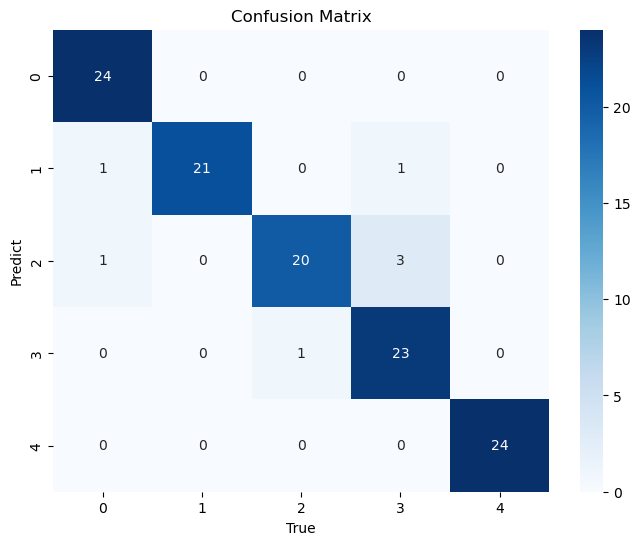

In [69]:
#xgboost
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normalisasi, y_train_normalisasi)

y_pred_xgb = xgb_model.predict(X_test_normalisasi)
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normalisasi = round(accuracy_score(y_test_normalisasi, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normalisasi)
print("Classification Report:")
print(classification_report(y_test_normalisasi, y_pred_xgb))

evaluation(y_test_normalisasi,y_pred_xgb)

cm = confusion_matrix(y_test_normalisasi, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# Tuning Model

In [70]:
from sklearn.model_selection import RandomizedSearchCV

In [71]:
knn_model = KNeighborsClassifier()
param_grid = {
"n_neighbors": range(3, 21),
"metric": ["euclidean", "manhattan", "chebyshev"],
"weights": ["uniform", "distance"],
"algorithm": ["auto", "ball_tree", "kd_tree"],
"leaf_size": range(10, 61),
}
knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)
knn_model.fit(X_train_normalisasi, y_train_normalisasi)
best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'weights': 'distance', 'n_neighbors': 19, 'metric': 'euclidean', 'leaf_size': 16, 'algorithm': 'ball_tree'}


In [72]:
y_pred_knn = knn_model.predict(X_test_normalisasi)
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normalisasi,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal_Tun*100)
print("Classification Report:")
print(classification_report(y_test_normalisasi, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 90.8
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        24
         1.0       0.95      0.91      0.93        23
         2.0       0.90      0.79      0.84        24
         3.0       0.88      0.92      0.90        24
         4.0       0.92      1.00      0.96        24

    accuracy                           0.91       119
   macro avg       0.91      0.91      0.91       119
weighted avg       0.91      0.91      0.91       119



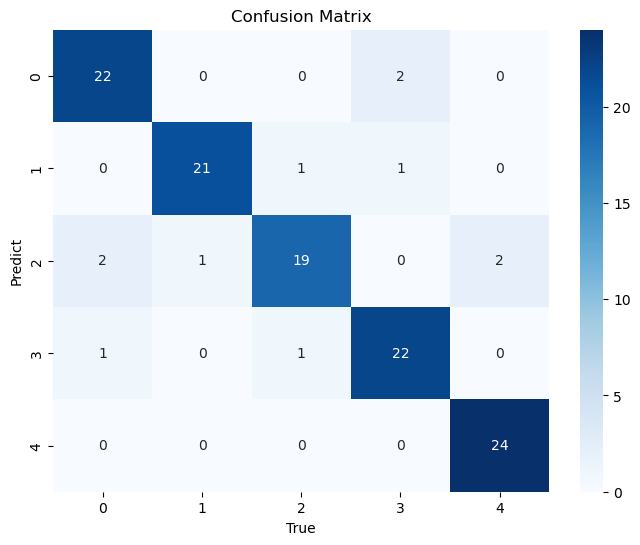

In [73]:
cm = confusion_matrix(y_test_normalisasi, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [74]:
#rf
rf_model = RandomForestClassifier()
param_grid = {
"n_estimators": [100, 200],
"max_depth": [ 10, 15],
"min_samples_leaf": [1, 2],
"min_samples_split": [2, 5],
"max_features": ["sqrt", "log2"],
# "random_state": [42, 100, 200]
}
rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1,random_state=42)
rf_model.fit(X_train_normalisasi, y_train_normalisasi)
best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")

y_pred_rf = rf_model.predict(X_test_normalisasi)
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normalisasi, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normalisasi, y_pred_rf))

evaluation(y_test_normalisasi,y_pred_rf)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}

Random Forest Model:
Accuracy: 0.933
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        24
         1.0       0.91      0.91      0.91        23
         2.0       0.91      0.83      0.87        24
         3.0       0.92      0.92      0.92        24
         4.0       1.00      1.00      1.00        24

    accuracy                           0.93       119
   macro avg       0.93      0.93      0.93       119
weighted avg       0.93      0.93      0.93       119

{'accuracy': 0.933, 'recall': 0.933, 'F1 score': 0.932, 'Precision score': 0.933}


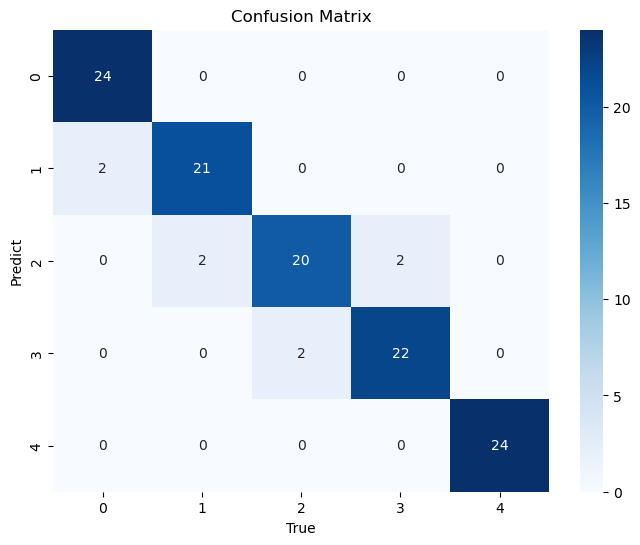

In [75]:
cm = confusion_matrix(y_test_normalisasi, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

Best parameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}

XGBoost Model:
Accuracy: 0.916
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        24
         1.0       0.88      0.91      0.89        23
         2.0       0.95      0.83      0.89        24
         3.0       0.88      0.92      0.90        24
         4.0       1.00      1.00      1.00        24

    accuracy                           0.92       119
   macro avg       0.92      0.92      0.92       119
weighted avg       0.92      0.92      0.92       119

{'accuracy': 0.916, 'recall': 0.916, 'F1 score': 0.916, 'Precision score': 0.918}


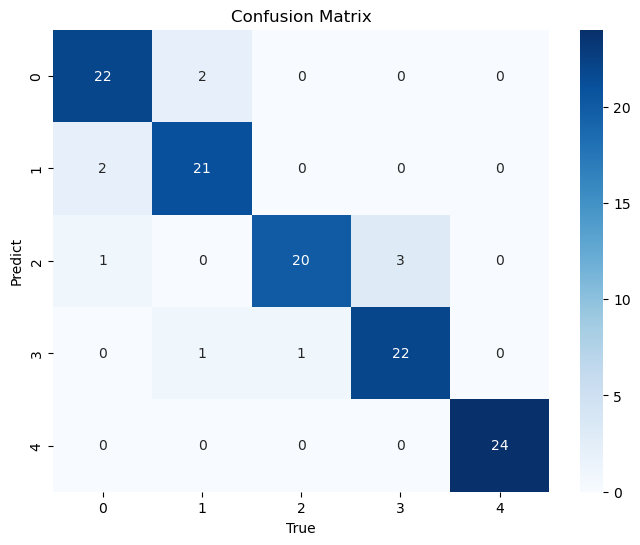

In [76]:
#xgboost
xgb_model = XGBClassifier()
param_grid = {
"max_depth": [3, 5, 7],
"learning_rate": [0.01, 0.1],
"n_estimators": [100, 200],
"gamma": [0, 0.1],
"colsample_bytree": [0.7, 0.8],
}
xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)
xgb_model.fit(X_train_normalisasi, y_train_normalisasi)
best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")

y_pred_xgb = xgb_model.predict(X_test_normalisasi)
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normalisasi, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normalisasi, y_pred_xgb))

evaluation(y_test_normalisasi,y_pred_xgb)

cm = confusion_matrix(y_test_normalisasi, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [77]:
# Evaluasi

In [78]:
model_comp1 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest','XGBoost'], 
                            'Accuracy': [accuracy_knn_smote*100,
                                         accuracy_rf_smote*100,
                                         accuracy_xgb_smote*100]})
model_comp1.head()

,Model,Accuracy
0,K-Nearest Neighbour,76.5
1,Random Forest,93.3
2,XGBoost,94.1


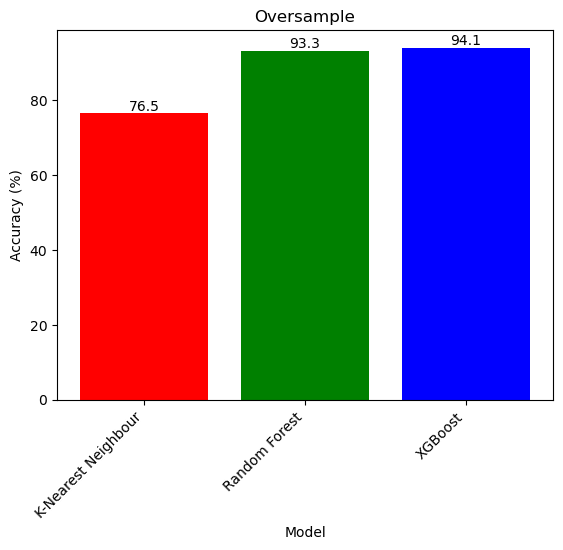

In [79]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca
# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [80]:
model_comp2 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest','XGBoost'], 
                            'Accuracy': [accuracy_knn_smote_normalisasi*100,
                                         accuracy_rf_smote_normalisasi*100,
                                         accuracy_xgb_smote_normalisasi*100]})

model_comp2.head()

,Model,Accuracy
0,K-Nearest Neighbour,73.9
1,Random Forest,92.4
2,XGBoost,94.1


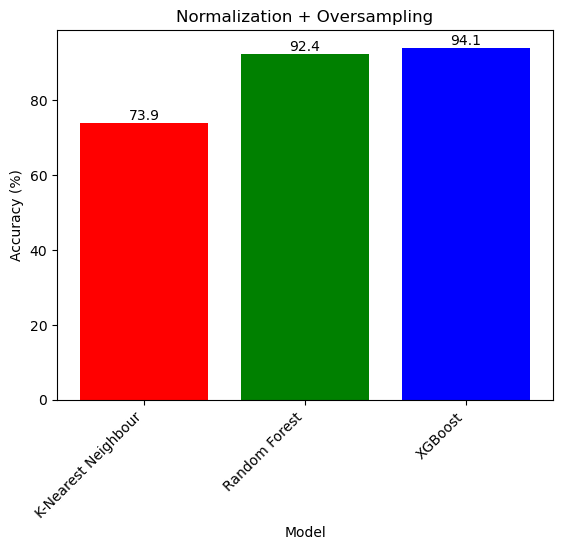

In [81]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca
# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [82]:
model_comp3 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest','XGBoost'], 
                            'Accuracy': [accuracy_knn_smote_normal_Tun*100,
                                         accuracy_rf_smote_normal_Tun*100,
                                         accuracy_xgb_smote_normal_Tun*100]})

model_comp3.head()

,Model,Accuracy
0,K-Nearest Neighbour,90.8
1,Random Forest,93.3
2,XGBoost,91.6


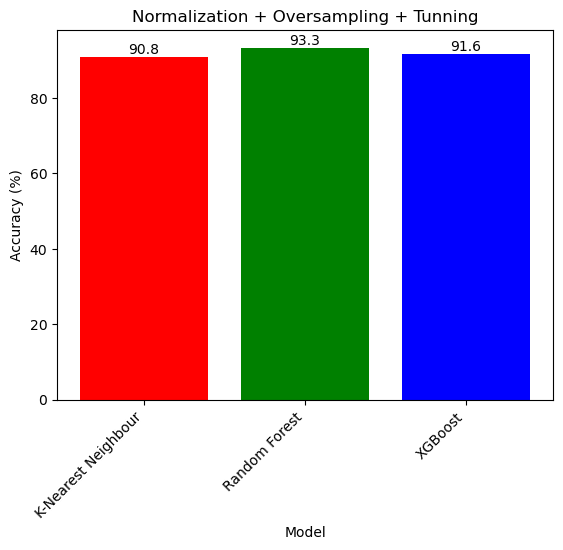

In [83]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca
# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

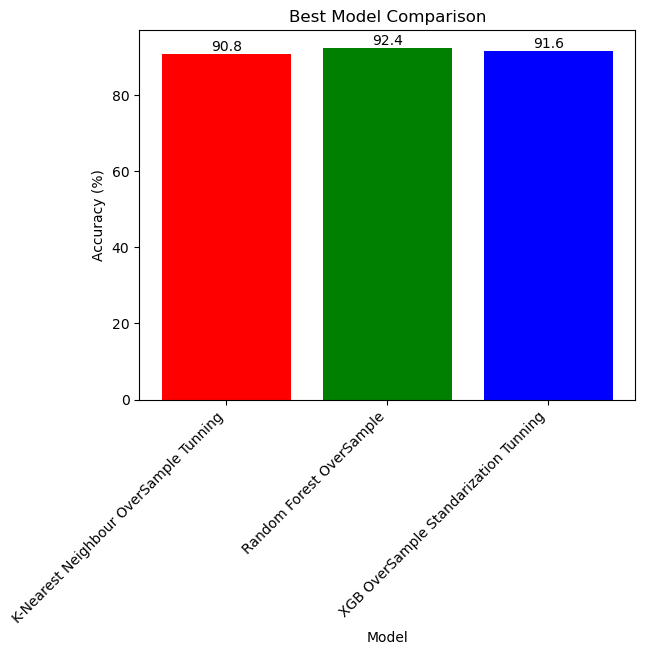

In [84]:
# Data frame
model_compBest = pd.DataFrame({
    'Model': ['K-Nearest Neighbour OverSample Tunning', 'Random Forest OverSample',
              'XGB OverSample Standarization Tunning'],
    'Accuracy': [accuracy_knn_smote_normal_Tun*100, accuracy_rf_smote_normalisasi*100,
                 accuracy_xgb_smote_normal_Tun*100]
})

# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca
# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()